# Pre-Processing Step (Letter Recognition Pattern Data set)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('letter-recognition - kyan - With_6percent_NaN - float64.data')
display(df)

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2.0,8.0,3.0,5.0,1.0,8.0,13.0,0.0,6.0,6.0,10.0,8.0,0.0,8.0,0.0,8.0
1,I,5.0,12.0,3.0,7.0,2.0,10.0,5.0,5.0,4.0,13.0,3.0,9.0,2.0,8.0,4.0,10.0
2,D,4.0,11.0,6.0,8.0,6.0,10.0,6.0,2.0,6.0,10.0,3.0,7.0,3.0,7.0,3.0,9.0
3,N,7.0,11.0,6.0,6.0,3.0,5.0,9.0,4.0,6.0,4.0,4.0,10.0,6.0,10.0,NaN,8.0
4,G,2.0,1.0,3.0,1.0,1.0,8.0,6.0,NaN,6.0,6.0,5.0,9.0,1.0,7.0,5.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2.0,2.0,3.0,3.0,2.0,7.0,7.0,NaN,6.0,6.0,6.0,4.0,2.0,NaN,3.0,7.0
19996,C,7.0,10.0,8.0,8.0,4.0,4.0,8.0,6.0,9.0,12.0,9.0,13.0,2.0,9.0,NaN,7.0
19997,T,6.0,9.0,6.0,7.0,5.0,6.0,11.0,3.0,7.0,11.0,9.0,5.0,2.0,12.0,2.0,4.0
19998,S,2.0,3.0,4.0,2.0,1.0,8.0,7.0,2.0,6.0,10.0,6.0,8.0,1.0,9.0,5.0,8.0


### delete rows with more than threshold 

In [2]:
# 1. delete records with more than a threshhold #Missing Values
# to have the same # rows for both X (input) and Y (output) --> execute before splitiing
import math

def del_record_nan(dataframe, threshold):
    '''
    delete the records with more than threshold% NaN values
    '''
    to_delete = []
    for index, attributes in dataframe.iterrows():
        if attributes.isnull().sum() > math.floor(dataframe.shape[1] * threshold):
            to_delete.append(index)
            
    print(f'"{len(to_delete)}" records had more than "{threshold * 100}%" NaN values thus were deleted\n')
            
    # delete the records with more than threshhold NaN
    df_after_del = dataframe.drop([dataframe.index[i] for i in to_delete])
    return df_after_del

threshold = 0.25
df = del_record_nan(df, threshold)

"36" records had more than "25.0%" NaN values thus were deleted



### Split Data -to-> Train, Test

In [9]:
from sklearn.model_selection import train_test_split

X = df.loc[:, 'x-box':'yegvx']
Y = df[['lettr']]

# we could add shuffile=False arg to avoid having non-continuous index but as shuffile=True 
# has more randomness and we don't wan't our model to be biased we use the default shuffile=True
# so I used shuffle=True and used .reset_index() to reset the index to be from 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Train data, X: input, Y: output
# make them to be from index 0
X_train.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

# Test data, X: input, Y: output
# make them to be from index 0
X_test.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

display(X_train, Y_train)
display(X_test, Y_test)

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,3.0,4.0,NaN,6.0,6.0,8.0,9.0,5.0,0.0,8.0,6.0,6.0,5.0,9.0,5.0,8.0
1,4.0,9.0,5.0,7.0,4.0,5.0,7.0,6.0,5.0,9.0,8.0,10.0,2.0,8.0,4.0,9.0
2,5.0,9.0,5.0,6.0,2.0,4.0,7.0,9.0,2.0,7.0,5.0,11.0,4.0,8.0,2.0,11.0
3,3.0,5.0,5.0,7.0,5.0,9.0,10.0,3.0,1.0,8.0,6.0,7.0,3.0,10.0,8.0,NaN
4,4.0,7.0,4.0,5.0,4.0,7.0,8.0,5.0,9.0,7.0,7.0,9.0,1.0,9.0,7.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13969,1.0,7.0,2.0,5.0,1.0,13.0,3.0,7.0,NaN,13.0,3.0,11.0,0.0,6.0,0.0,8.0
13970,2.0,3.0,3.0,2.0,2.0,8.0,7.0,2.0,5.0,NaN,5.0,7.0,2.0,8.0,3.0,9.0
13971,3.0,1.0,4.0,3.0,3.0,8.0,6.0,6.0,4.0,7.0,7.0,8.0,7.0,6.0,2.0,NaN
13972,NaN,4.0,3.0,3.0,2.0,6.0,7.0,6.0,6.0,6.0,6.0,11.0,2.0,9.0,4.0,9.0


,lettr
0,P
1,G
2,K
3,H
4,Z
...,...
13969,J
13970,B
13971,M
13972,G


,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,3.0,NaN,5.0,5.0,2.0,8.0,6.0,7.0,8.0,6.0,5.0,10.0,1.0,8.0,6.0,11.0
1,3.0,6.0,5.0,4.0,5.0,8.0,6.0,5.0,2.0,7.0,6.0,8.0,7.0,9.0,3.0,9.0
2,3.0,7.0,4.0,7.0,3.0,7.0,6.0,8.0,5.0,5.0,6.0,8.0,3.0,8.0,5.0,9.0
3,3.0,4.0,5.0,NaN,2.0,7.0,8.0,2.0,8.0,11.0,6.0,9.0,2.0,8.0,4.0,8.0
4,NaN,9.0,9.0,7.0,4.0,7.0,10.0,NaN,8.0,14.0,6.0,3.0,1.0,10.0,3.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5985,6.0,10.0,8.0,8.0,9.0,7.0,6.0,6.0,4.0,8.0,7.0,8.0,4.0,10.0,8.0,11.0
5986,5.0,10.0,7.0,8.0,4.0,10.0,7.0,NaN,6.0,12.0,3.0,4.0,2.0,9.0,3.0,9.0
5987,NaN,0.0,2.0,0.0,0.0,7.0,7.0,3.0,10.0,8.0,6.0,8.0,0.0,8.0,6.0,8.0
5988,2.0,4.0,4.0,3.0,2.0,6.0,7.0,6.0,6.0,6.0,6.0,10.0,2.0,8.0,4.0,9.0


,lettr
0,G
1,O
2,Q
3,E
4,F
...,...
5985,F
5986,P
5987,Z
5988,G


### Show how good is our train-test split

'Y Train'

lettr,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
percentage,4.01,3.83,3.61,3.84,3.83,3.78,3.87,3.74,3.71,3.73,...,3.96,3.86,3.71,4.11,4.17,3.86,3.7,3.92,3.91,3.46


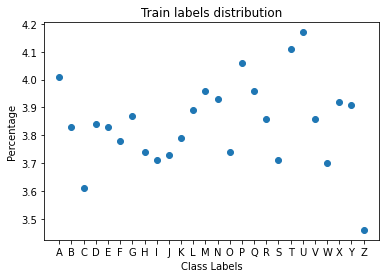

-------------------------------------------------------------------------------


'Y Test'

lettr,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
percentage,3.77,3.86,3.81,4.46,3.87,4.09,3.84,3.51,3.92,3.71,...,3.82,3.62,3.84,3.67,3.81,3.74,3.87,3.96,3.97,4.17


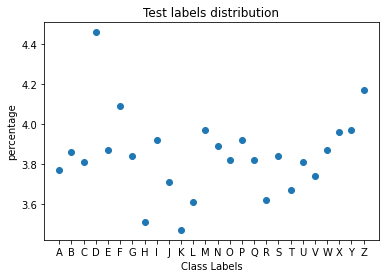

/home/tekboart/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


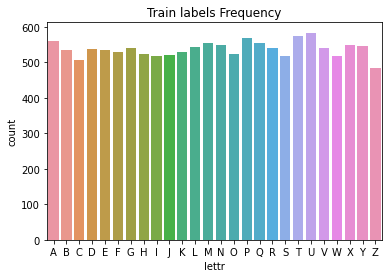

/home/tekboart/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


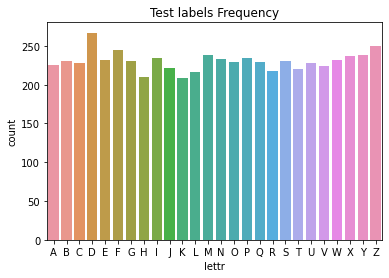

In [14]:
# this cell is to show out train & test split is not biased toward a certain class label

Y_train_eda = (pd.DataFrame(Y_train.value_counts(normalize=True).sort_index()) * 100).round(2)
Y_train_eda.rename(columns={0: 'percentage'}, inplace=True)
Y_test_eda = (pd.DataFrame(Y_test.value_counts(normalize=True).sort_index()) * 100).round(2)
Y_test_eda.rename(columns={0: 'percentage'}, inplace=True)

display('Y Train', Y_train_eda.transpose())

plt.title('Train labels distribution')
plt.xlabel('Class Labels')
plt.ylabel('Percentage')
# plt.hist(Y_train_eda)
plt.scatter(Y_train_eda.index.map(lambda x: x[0]), Y_train_eda)
plt.show()



print("-"*79)


display('Y Test', Y_test_eda.transpose())

plt.title('Test labels distribution')
plt.xlabel('Class Labels')
plt.ylabel('percentage')
# plt.hist(Y_train_eda)
plt.scatter(Y_test_eda.index.map(lambda x: x[0]), Y_test_eda)
plt.show()

# bar plot to show frequency of train/test class labels
# for train set
plt.title('Train labels Frequency')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
sns.countplot(Y_train['lettr'].sort_values())
plt.show()

# for test set
plt.title('Test labels Frequency')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
sns.countplot(Y_test['lettr'].sort_values())
plt.show()

###  Fill Missing Values (by KNN imputer)

In [5]:
from sklearn.impute import KNNImputer

# k=3 for Knn imputation has been proved to be good enough
imputer = KNNImputer(n_neighbors=3, missing_values=np.nan)
X_train_fillna_Knn = pd.DataFrame(imputer.fit_transform(X_train).round(0), columns=X_train.columns)
X_test_fillna_Knn = pd.DataFrame(imputer.fit_transform(X_test).round(0), columns=X_test.columns)

display(X_train_fillna_Knn, X_test_fillna_Knn)

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,3.0,4.0,4.0,6.0,6.0,8.0,9.0,5.0,0.0,8.0,6.0,6.0,5.0,9.0,5.0,8.0
1,4.0,9.0,5.0,7.0,4.0,5.0,7.0,6.0,5.0,9.0,8.0,10.0,2.0,8.0,4.0,9.0
2,5.0,9.0,5.0,6.0,2.0,4.0,7.0,9.0,2.0,7.0,5.0,11.0,4.0,8.0,2.0,11.0
3,3.0,5.0,5.0,7.0,5.0,9.0,10.0,3.0,1.0,8.0,6.0,7.0,3.0,10.0,8.0,6.0
4,4.0,7.0,4.0,5.0,4.0,7.0,8.0,5.0,9.0,7.0,7.0,9.0,1.0,9.0,7.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13969,1.0,7.0,2.0,5.0,1.0,13.0,3.0,7.0,4.0,13.0,3.0,11.0,0.0,6.0,0.0,8.0
13970,2.0,3.0,3.0,2.0,2.0,8.0,7.0,2.0,5.0,10.0,5.0,7.0,2.0,8.0,3.0,9.0
13971,3.0,1.0,4.0,3.0,3.0,8.0,6.0,6.0,4.0,7.0,7.0,8.0,7.0,6.0,2.0,7.0
13972,2.0,4.0,3.0,3.0,2.0,6.0,7.0,6.0,6.0,6.0,6.0,11.0,2.0,9.0,4.0,9.0


,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,3.0,7.0,5.0,5.0,2.0,8.0,6.0,7.0,8.0,6.0,5.0,10.0,1.0,8.0,6.0,11.0
1,3.0,6.0,5.0,4.0,5.0,8.0,6.0,5.0,2.0,7.0,6.0,8.0,7.0,9.0,3.0,9.0
2,3.0,7.0,4.0,7.0,3.0,7.0,6.0,8.0,5.0,5.0,6.0,8.0,3.0,8.0,5.0,9.0
3,3.0,4.0,5.0,3.0,2.0,7.0,8.0,2.0,8.0,11.0,6.0,9.0,2.0,8.0,4.0,8.0
4,6.0,9.0,9.0,7.0,4.0,7.0,10.0,2.0,8.0,14.0,6.0,3.0,1.0,10.0,3.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5985,6.0,10.0,8.0,8.0,9.0,7.0,6.0,6.0,4.0,8.0,7.0,8.0,4.0,10.0,8.0,11.0
5986,5.0,10.0,7.0,8.0,4.0,10.0,7.0,3.0,6.0,12.0,3.0,4.0,2.0,9.0,3.0,9.0
5987,1.0,0.0,2.0,0.0,0.0,7.0,7.0,3.0,10.0,8.0,6.0,8.0,0.0,8.0,6.0,8.0
5988,2.0,4.0,4.0,3.0,2.0,6.0,7.0,6.0,6.0,6.0,6.0,10.0,2.0,8.0,4.0,9.0


###  Export the dataset (before normalization) for clustering

In [11]:
# merge the train & test data (before normalization) for clustering
# since we normalize train and test data separately and due to the fact 
# that we standardize the data before clustering it was wise to merge and extract the dataset
# before normalization

Y_train.set_index(X_train_fillna_Knn.index, inplace=True)
Y_test.set_index(X_test_fillna_Knn.index, inplace=True)

# put back the target label col()
X_train_fillna_Knn['lettr'] = Y_train
X_test_fillna_Knn['lettr'] = Y_test

df_for_clustering = X_train_fillna_Knn.append(X_test_fillna_Knn)

# fix the indexing (that was caused by splitting train/test)
df_for_clustering = df_for_clustering.reset_index(drop=True)

display('dataset for clustering', df_for_clustering)
df_for_clustering.to_csv('dataset_for_clustering.csv', index=0)

'dataset for clustering'

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,lettr
0,3.0,4.0,4.0,6.0,6.0,8.0,9.0,5.0,0.0,8.0,6.0,6.0,5.0,9.0,5.0,8.0,P
1,4.0,9.0,5.0,7.0,4.0,5.0,7.0,6.0,5.0,9.0,8.0,10.0,2.0,8.0,4.0,9.0,G
2,5.0,9.0,5.0,6.0,2.0,4.0,7.0,9.0,2.0,7.0,5.0,11.0,4.0,8.0,2.0,11.0,K
3,3.0,5.0,5.0,7.0,5.0,9.0,10.0,3.0,1.0,8.0,6.0,7.0,3.0,10.0,8.0,6.0,H
4,4.0,7.0,4.0,5.0,4.0,7.0,8.0,5.0,9.0,7.0,7.0,9.0,1.0,9.0,7.0,8.0,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19959,6.0,10.0,8.0,8.0,9.0,7.0,6.0,6.0,4.0,8.0,7.0,8.0,4.0,10.0,8.0,11.0,F
19960,5.0,10.0,7.0,8.0,4.0,10.0,7.0,3.0,6.0,12.0,3.0,4.0,2.0,9.0,3.0,9.0,P
19961,1.0,0.0,2.0,0.0,0.0,7.0,7.0,3.0,10.0,8.0,6.0,8.0,0.0,8.0,6.0,8.0,Z
19962,2.0,4.0,4.0,3.0,2.0,6.0,7.0,6.0,6.0,6.0,6.0,10.0,2.0,8.0,4.0,9.0,G


### normalize data with robust scaler (resistant to outliers)

In [7]:
# # this is not needed as we don't have outliers (so min max will suffice)
# from sklearn.preprocessing import RobustScaler

# X_train_normal = pd.DataFrame(RobustScaler().fit(X_train_fillna_Knn).transform(X_train_fillna_Knn), columns=X_train_fillna_Knn.columns)

# X_train_normal

### normalize data with Min-Max (sensitive to outliers --> but we don't have outliers)

In [8]:
# our data is already normalize (0 - 15 int) so it is meaningless
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
# since output doesn't have col names we create a new df with col names
# used .round(n) to round the numbers to n decimal fractions
X_train_normal = pd.DataFrame(scaler.fit_transform(X_train_fillna_Knn).round(3) , columns=X_train_fillna_Knn.columns)
X_test_normal = pd.DataFrame(scaler.fit_transform(X_test_fillna_Knn).round(3) , columns=X_test_fillna_Knn.columns)

display(X_train_normal, X_test_normal)

ValueError: could not convert string to float: 'P'

### merge the X and Y

In [ ]:
# match the index of X and Y -otherwise-> will get NaN in lettr col (for test set) --> since Y has different indeces
# could use reset_index() on Y_test (since X index is from 0 (after normalizing) but it is more robust to match Y index with X)
Y_train.set_index(X_train_normal.index, inplace=True)
Y_test.set_index(X_test_normal.index, inplace=True)

# put back the target label col()
# method 1
X_train_normal['lettr'] = Y_train
X_test_normal['lettr'] = Y_test

# # method 2
# # has a drawback: running this cell multiple time result in having multiple 'lettr' col
# # since concat doesn't care if 'lettr' col already exist (unlike method 1)
# X_train_normal = pd.concat([X_train_normal, Y_train], axis=1)
# X_test_normal = pd.concat([X_test_normal, Y_test], axis = 1)


display('Final Train dataset', X_train_normal, 'Final Test dataset', X_train_normal)

### Detect and remove outliers (not needed did it just as a practice)
#### not a wise idea as described before --> based on pairplot the values we see in box-plot are not real outliers

#### for train set

In [ ]:
# # calc quartile -then-> IQR
# Q1 = X_train_normal.quantile(0.25)
# Q3 = X_train_normal.quantile(0.75)
# IQR = Q3 - Q1
# print(f'IQR for all train columns\n{"-" * 30}\n{IQR}')

# train_w_outlier = X_train_normal.shape[0]

# # running it several times removes more and more records (as IQR changes after removal)
# X_train_normal = X_train_normal[~((X_train_normal < (Q1 - 1.5 * IQR)) | (X_train_normal > (Q3 + 1.5 * IQR))).any(axis=1)]

# train_wo_outlier = X_train_normal.shape[0]

# # 8376 of train records have outliers in them and therefore are deleted 
# print(f'{"-" * 30}\nHow many records were deleted for having outliers?\n{train_w_outlier - train_wo_outlier}')

# # plot box-plot# set the plot configs
# sns.set_theme(style="whitegrid")
# fig, ax = plt.subplots(figsize=(15, 5))
# # remove grids
# ax.grid(False)

# ax = sns.boxplot(data=X_train_normal, palette="Set3", ax=ax, width=.5)

#### for test set

In [ ]:
# # calc quartile -then-> IQR
# Q1 = X_test_normal.quantile(0.25)
# Q3 = X_test_normal.quantile(0.75)
# IQR = Q3 - Q1
# print(f'IQR for all test columns\n{"-" * 30}\n{IQR}')

# test_w_outlier = X_test_normal.shape[0]

# # running it several times removes more and more records (as IQR changes after removal)
# X_test_normal = X_test_normal[~((X_test_normal < (Q1 - 1.5 * IQR)) |(X_test_normal > (Q3 + 1.5 * IQR))).any(axis=1)]

# test_wo_outlier = X_test_normal.shape[0]

# # 8376 of test records have outliers in them and therefore are deleted 
# print(f'{"-" * 30}\nHow many records were deleted for having outliers?\n{test_w_outlier - test_wo_outlier}')

# # plot box-plot# set the plot configs
# sns.set_theme(style="whitegrid")
# fig, ax = plt.subplots(figsize=(15, 5))
# # remove grids
# ax.grid(False)

# ax = sns.boxplot(data=X_test_normal, palette="Set3", ax=ax, width=.5)

### create and export final data set(s) (to be used for our models)

In [ ]:
# # method 1: create a unified dataset (since we normalized train & test sets separately not a good idea) 
# # this is our data set after pre-processing phases (fill missing + normalize) --> now use it in your models
# df_preprocessed = (X_train_normal.append(X_test_normal)).reset_index(drop=True)
# df_preprocessed.to_csv('letter_recognition_preprocessed.data', index=0)

# method 2: create separate dataset (to be used in models without the need to split them for each model)
X_train_normal.to_csv('df_train.data', index=0)
X_test_normal.to_csv('df_test.data', index=0)

### convert col(s) from float64 to int64

In [ ]:
# # not needed as after normalizing we are left out with float64
# X_train_fillna_Knn = X_train_fillna_Knn.astype(np.int64)
# X_train_fillna_Knn